# Content translation from English to Thai 

## The change of source and target articles after it got translated

# Table of contents
1. [Objectives](#Objectives)
2. [Methods](#Methods)
3. [Initialization](#Initialization)
4. [Data exploration](#Dataexplo)
5. [Analyses](#Analyses)

   5.1 [Quantitative](#Quantitative)
     
      5.1.1 [The source article edit amount since it got translated](#sourceEdit)
     
      5.1.2 [The target article edit amount since the translation](#targetEdit)
        
      5.1.3 [The source article cumulative size change since the translation](#sourceSizeChange)
      
      5.1.4 [The target article cumulative size change since it the translation](#targetSizeChange)
      
      5.1.5 [Quantitative test discuession](#Quantitativedis)
      
   5.2 [Qualitative](#Qualitative)
   
      5.2.1 [Highest sourceEdit article](#Highse)
      
      5.2.2 [Highest targetEdit article](#Highte)
      
      5.2.3 [Highest sourceSizeChange article](#Highsc)
      
      5.2.4 [Highest targetSizeChange article](#Hightc)
      
      5.2.5 [Qualitative test discuession](#Qualitativedis)
      
6. [Conclusion](#Conclusion)
7. [Opportunities for furture study](#Opportunities)
8. [Others data explore](#Others)

## Objectives <a name="Objectives"></a>
+ Count edit times and size changed of articles since the translation
+ Find the content that change after the translation
+ Find the difference and similarity in the current source and target articles when both articles have been edited

## Methods <a name="Methods"></a>
+ Quantitative
    + Use revisions API to collect source edit amount since the translation, target edit amount, source size change since the translation, and target size change since the translation
    + Create Pandas dataframe to collect and explore the result
+ Qualitative
    + Analize the the edit content of source and target articles since the translation by using compare selected revisions on history page on Wikipedia and see the change and the detail of the change since the translation date. 

## Initialization  <a name="Initialization"></a>

follow steps according to https://paws-public.wmflabs.org/paws-public/User:Isaac_(WMF)/Content%20Translation%20Example.ipynb#Alternative-view-of-the-data-via-Pandas

In [1]:
#imports
import gzip
import json
import re

import mwapi
import pandas as pd

import mwviews
from mwviews.api import PageviewsClient

import numpy as np
from numpy import nan
from scipy import stats

import matplotlib.pyplot as plt

In [2]:
# get session for English articles
session = mwapi.Session(host='https://en.wikipedia.org',
                        user_agent='mwapi (python) -- outreachy content translation')

In [3]:
# get session for Thai articles
session_th = mwapi.Session(host='https://th.wikipedia.org',
                        user_agent='mwapi (python) -- outreachy content translation')

In [4]:
# articles translated from English -> Thai
parameters = {'action':'query',
              'format':'json',
              'list':'cxpublishedtranslations',
              'from':'en',
              'to':'th',
              'limit':500,
              'offset':2500}

# Data exploration <a name="Dataexplo"></a>

In [5]:
res = session.get(parameters)

In [6]:
df = pd.DataFrame(res['result']['translations'])
df.head(10)

,publishedDate,sourceLanguage,sourceRevisionId,sourceTitle,sourceURL,stats,targetLanguage,targetRevisionId,targetTitle,targetURL,translationId
0,20180616090318,en,846093806,Sonia Scurfield,//en.wikipedia.org/wiki/Sonia Scurfield,"{'any': 0.41319606925597, 'human': 0.313991576...",th,7678509,ซอนย่า สเกอร์ฟิลด์,//th.wikipedia.org/wiki/ซอนย่า สเกอร์ฟิลด์,491563
1,20180616092527,en,844984088,Andrew Massey (conductor),//en.wikipedia.org/wiki/Andrew Massey (conductor),"{'any': 0.92383292383292, 'human': 0.883292383...",th,7678529,แอนดี แมสซีย์ (วาทยากร),//th.wikipedia.org/wiki/แอนดี แมสซีย์ (วาทยากร),491571
2,20180616093431,en,845176394,Sam Moore (publisher),//en.wikipedia.org/wiki/Sam Moore (publisher),"{'any': 0.42849223946785, 'human': 0.428492239...",th,7678540,ซัม มัวร์ (ผู้เผยแพร่),//th.wikipedia.org/wiki/ซัม มัวร์ (ผู้เผยแพร่),491580
3,20180901233542,en,845016481,André Desvages,//en.wikipedia.org/wiki/André Desvages,"{'any': 0.59139784946237, 'human': 0.479569892...",th,7678579,อ็องเดร เดอวาก,//th.wikipedia.org/wiki/อ็องเดร เดอวาก,491589
4,20180616095938,en,845590955,Johnnie Keyes,//en.wikipedia.org/wiki/Johnnie Keyes,"{'any': 0.86713995943205, 'human': 0.735294117...",th,7678608,จอห์นนี่ คียส์,//th.wikipedia.org/wiki/จอห์นนี่ คียส์,491591
5,20180901233542,en,844509740,Robert Forhan,//en.wikipedia.org/wiki/Robert Forhan,"{'any': 0.39078498293515, 'human': 0.322525597...",th,7678635,โรเบิร์ต ฟอร์แฮน,//th.wikipedia.org/wiki/โรเบิร์ต ฟอร์แฮน,491595
6,20180901233521,en,829989743,Amand Dalem,//en.wikipedia.org/wiki/Amand Dalem,"{'any': 0.96084337349398, 'human': 0.960843373...",th,7678839,อามันด์ ดาเลม,//th.wikipedia.org/wiki/อามันด์ ดาเลม,491657
7,20180616124609,en,823655681,Édouard Ferrand,//en.wikipedia.org/wiki/Édouard Ferrand,"{'any': 0.96287703016241, 'human': 0.962877030...",th,7678856,เอดูอาร์ แฟร็อง,//th.wikipedia.org/wiki/เอดูอาร์ แฟร็อง,491660
8,20180901233519,en,823520159,Zeng Jinyan,//en.wikipedia.org/wiki/Zeng Jinyan,"{'any': 0.30705190989226, 'human': 0.215964740...",th,7678890,เจิ้ง จินย่าน,//th.wikipedia.org/wiki/เจิ้ง จินย่าน,491672
9,20180616232534,en,845477568,Jean-Baptiste Kim,//en.wikipedia.org/wiki/Jean-Baptiste Kim,"{'any': 0.617903930131, 'human': 0.61790393013...",th,7679569,จีน-บาติสต์ คิม,//th.wikipedia.org/wiki/จีน-บาติสต์ คิม,491909


#### Explore on stats column

In [7]:
df_stats = df['stats'].apply(pd.Series)
df_stats.head()

,any,human,mt,mtSectionsCount,translatedSectionsCount
0,0.413196,0.313992,0.099204,1.0,NaN
1,0.923833,0.883292,0.040541,1.0,NaN
2,0.428492,0.428492,0.000000,0.0,NaN
3,0.591398,0.479570,0.111828,1.0,NaN
4,0.867140,0.735294,0.131846,1.0,NaN


In [8]:
df_stats.describe()

,any,human,mt,mtSectionsCount,translatedSectionsCount
count,500.000000,500.000000,500.000000,500.000000,4.000000
mean,0.724505,0.628018,0.096488,1.532000,20.750000
std,0.569838,0.583701,0.240336,5.035045,17.783419
min,0.000000,0.000000,0.000000,0.000000,3.000000
25%,0.352576,0.239826,0.000000,0.000000,11.250000
50%,0.574587,0.440298,0.002692,1.000000,17.500000
75%,0.894474,0.834261,0.062125,1.000000,27.000000
max,4.302449,4.302449,2.862802,64.000000,45.000000


In [9]:
df_stats[df_stats['any'] > 2.5]

,any,human,mt,mtSectionsCount,translatedSectionsCount
321,3.530609,3.333557,0.197051,1.0,NaN
378,2.788609,2.788609,0.000000,0.0,NaN
379,2.508139,2.506511,0.001628,1.0,NaN
438,2.906087,0.043285,2.862802,1.0,NaN
440,2.948431,2.948431,0.000000,0.0,NaN
464,2.911345,2.852139,0.059206,1.0,NaN
481,2.570600,2.570600,0.000000,0.0,NaN
485,4.302449,4.302449,0.000000,0.0,NaN


In [10]:
df_stats[df_stats['mt'] > 1]

,any,human,mt,mtSectionsCount,translatedSectionsCount
46,1.090814,0.000000,1.090814,8.0,NaN
419,2.197262,0.060021,2.137241,1.0,NaN
438,2.906087,0.043285,2.862802,1.0,NaN


**Note:** It can be seen that some articles has `any` (total translation percentage) and `mt` (machine translation percentage) higher than 1.
Which [Outreachy mentor explained that the number base on word count.](https://phabricator.wikimedia.org/T218003#5029680) So it is possible that word in source article is higher than translated article, resulted in `any` and `mt` higher than 1.

#### Get corresponding parallel translation

In [11]:
#Download dump to access all translated articles
json_str = ""
with gzip.open('cx-corpora.en2th.text.json.gz', 'rt', encoding='utf-8') as fin:
    for line in fin:
        json_str += line.strip()
# remove repetitive commas
json_str = re.sub(',{2,}', ',', json_str)
parallel_corpus = json.loads(json_str)

In [12]:
print("Descriptive statistics:")
print("{0} translated sections.".format(len(parallel_corpus)))
print("{0} translated articles.".format(len(set(sec['id'].split('/')[0] for sec in parallel_corpus))))

Descriptive statistics:
18300 translated sections.
2670 translated articles.


**Note:** according to [statistic on Thai Wikipedia](https://th.wikipedia.org/w/index.php?title=%E0%B8%9E%E0%B8%B4%E0%B9%80%E0%B8%A8%E0%B8%A9:%E0%B8%AA%E0%B8%96%E0%B8%B4%E0%B8%95%E0%B8%B4&action=raw), a total articles on Thai Wikipedia are 130,431 articles.

#### parallel translation data explore

In [13]:
mt_counts = {}
for sec in parallel_corpus:
    if sec['mt']:
        service = sec['mt']['engine']
        mt_counts[service] = mt_counts.get(service, 0) + 1
    else:
        mt_counts['no-mt'] = mt_counts.get('no-mt', 0) + 1
print("Machine translation services used: {0}".format(mt_counts))
print("\nExample:\n", parallel_corpus[0])

Machine translation services used: {'no-mt': 16474, 'Yandex': 1642, 'Google': 183, 'scratch': 1}

Example:
 {'id': '43176/mwcx-source-title', 'sourceLanguage': 'en', 'targetLanguage': 'th', 'source': {'content': 'M25 motorway'}, 'mt': None, 'target': {'content': 'มอเตอร์เวย์เอ็ม 25'}}


# Analyses <a name="Analyses"></a>

**TODO**

ดู talk กับ history few articles เปรียบเทียบที่แปลกับต้นฉบับ ณ ขณะนี้

What types of content were added after the translation? 

Are the articles diverging in content or staying similar? 

What sorts of discussions occur on the talk pages of translated articles?

Eventually we can do this in a more robust manner: more carefully choosing which articles to examine, developing more concrete questions to answer, building a code book for annotating article histories, content, or discussions, etc.

 "has new content in the source language been added to the target language"

## Quantitative <a name="Quantitative"></a>

**TODO**

ดูได้ไหมว่านับจากวันที่ที่แปล มีการ edit กี่ครั้ง คือนับจาก timestamp ตั้งแต่วันที่แปล นับทั้งต้นทางปลายทาง อันไหนที่มี edit รวม (?) มากที่สุด
แล้วค่อยไปดูรายละเอียดว่า article ที่มีการ edit มากๆ ต่างกันมากไหม เป็น edit เล็กๆ หรือใหญ่ๆ

ดูขนาดได้ด้วย

+ loop 0-499


+ result going to be in table, column are (done)
    + sourceTitle
    + sourceRevisionId
    + targetTitle
    + translationId > targetRevisionId
    + date of creating target article
    + source edit amount since it got translated
    + target edit amount
    + source size change since it got translated
    + target size change
+ count how many times it got edit on both articles
+ give explanation on why source_edit don't have to minus 1


In [14]:
#create emty dict for add data
edit_n_size_df = {'sourceTitle':[],
                            'sourceRevisionId':[],
                            'targetTitle':[],
                            'targetRevisionId':[],
                            'dateCreatingTarget':[],
                            'sourceEdit':[],
                            'targetEdit':[],
                            'sourceSizeChange':[],
                            'targetSizeChange':[]
                            }

In [15]:
#loop through 500 articles
for i in range(0,500):
    source_title = df.loc[i, 'sourceTitle']
    source_revid = df.loc[i, 'sourceRevisionId']
    target_title = df.loc[i, 'targetTitle']
    tid = df.loc[i,'targetRevisionId']
    
    edit_n_size_df['sourceTitle'].append(source_title)
    edit_n_size_df['sourceRevisionId'].append(source_revid)
    edit_n_size_df['targetTitle'].append(target_title)
    edit_n_size_df['targetRevisionId'].append(tid)
    
    # create paremeters for collect revision data from source articles
    revision_parameters_s = {
        "action": "query",
        "prop": "revisions",
        "titles": source_title,
        "rvprop": "timestamp|size|comment",
        "rvlimit": 100,
        "rvstartid": source_revid,
        "rvslots": "main",
        "formatversion": "2",
        "format": "json",
        "rvdir": "newer",
        "redirects": True
        }
    # revision data from source articles
    source_revisions = session.get(revision_parameters_s)
    
    # create paremeters for collect revision data from target articles
    revision_parameters_t = {
        "action": "query",
        "prop": "revisions",
        "titles": target_title,
        "rvprop": "timestamp|size|comment",
        "rvlimit": 100,
        "rvstartid": tid,
        "rvslots": "main",
        "formatversion": "2",
        "format": "json",
        "rvdir": "newer",
        "redirects": True
        }
    # revision data from target articles
    target_revisions = session_th.get(revision_parameters_t)
    
    # missing title or page moved or translated article
    if (target_title == "") or (('revisions' in target_revisions['query']['pages'][0])==False) or (( 'moved page' in source_revisions['query']['pages'][0]['revisions'][0]['comment']) == True) or (('missing' in target_revisions['query']['pages'][0]) == True):
        edit_n_size_df['dateCreatingTarget'].append(np.nan)
        edit_n_size_df['sourceEdit'].append(np.nan)
        edit_n_size_df['targetEdit'].append(np.nan)
        edit_n_size_df['sourceSizeChange'].append(np.nan)
        edit_n_size_df['targetSizeChange'].append(np.nan)

    else:
    
        # collect date of creating target article
        date_c_target = target_revisions['query']['pages'][0]['revisions'][0]['timestamp']
    
        # count source edit amount since it got translated
        source_edit_all = len(source_revisions['query']['pages'][0]['revisions'])    # all edit
        source_edit = 0
        for j in range(source_edit_all):
            if source_revisions['query']['pages'][0]['revisions'][j]['timestamp'] >= date_c_target:    # source edit date is higher or equal to target created date
                source_edit += 1
            
        # count target edit amount
        target_edit = len(target_revisions['query']['pages'][0]['revisions'])
    
        # find cumulative size change of source article since it got translated. Calculated by find size different between edit and sum those size different
        source_size = 0
        for r in range(source_edit):    # source_edit is also a row number of the oldest article after it got translated
            diff_size = source_revisions['query']['pages'][0]['revisions'][r+1]['size'] - source_revisions['query']['pages'][0]['revisions'][r]['size'] # newer size  - older size
            source_size += abs(diff_size) # wants to see the sum of the size that change, either decrease or increase of the size don't matter. So I put absolute there
        
        # find cumulative target size change
        target_size = 0
        for r in range(target_edit-1):    # target_edit is also a row number of target article last edit 
            diff_size = target_revisions['query']['pages'][0]['revisions'][r+1]['size'] - target_revisions['query']['pages'][0]['revisions'][r]['size'] # newer size  - older size
            target_size += abs(diff_size) # wants to see the sum of the size that change, either decrease or increase of the size don't matter. So I put absolute there
    
        # append data to dictionary
        edit_n_size_df['dateCreatingTarget'].append(date_c_target)
        edit_n_size_df['sourceEdit'].append(int(source_edit))
        edit_n_size_df['targetEdit'].append(int(target_edit))
        edit_n_size_df['sourceSizeChange'].append(int(source_size))
        edit_n_size_df['targetSizeChange'].append(int(target_size))

`dateCreatingTarget` is the date and time of article translation

`sourceEdit` is the source article edit amount since it got translated (amount of edit that happen after `dateCreatingTarget`)

`targetEdit` is  the target article edit amount since the translation

`sourceSizeChange` is the source article cumulative size change since the translation (either remove or add has been sum as positive value)

`targetSizeChange` is  the target article cumulative size change since it the translation (either remove or add has been sum as positive value)

**Note:** in the previous code, in the loop to find `source_size` the `source_edit` didn't minus 1. However, on the `target_size` the `target_edit-1`.This because the `source_size` is the source size change since it got translated.

For example, on Sonia Scurfield article, the translation date and time (`dateCreatingTarget`) is `2018-06-16T09:03:18Z` which mean the source version that got translated is the version before that time. The `source_edit`of this article is `3` means that this article had been edit 3 times after the translation.
To compare the edit size, the size need to be compare with one version before the translation time which is on the later row (`4`). Therefore `source_edit` doesn't need to minus 1.

While `target_size` have to minus `target_edit` by 1 because the size change have to compare to the first version that was created exactly on`dateCreatingTarget`.

In [16]:
edit_n_size_pd = pd.DataFrame(edit_n_size_df)

In [17]:
edit_n_size_pd.head(5)

,sourceTitle,sourceRevisionId,targetTitle,targetRevisionId,dateCreatingTarget,sourceEdit,targetEdit,sourceSizeChange,targetSizeChange
0,Sonia Scurfield,846093806,ซอนย่า สเกอร์ฟิลด์,7678509,2018-06-16T09:03:18Z,3.0,2.0,58.0,81.0
1,Andrew Massey (conductor),844984088,แอนดี แมสซีย์ (วาทยากร),7678529,2018-06-16T09:25:27Z,10.0,2.0,364.0,4.0
2,Sam Moore (publisher),845176394,ซัม มัวร์ (ผู้เผยแพร่),7678540,2018-06-16T09:34:31Z,1.0,3.0,10.0,85.0
3,André Desvages,845016481,อ็องเดร เดอวาก,7678579,2018-06-16T09:47:32Z,2.0,3.0,184.0,127.0
4,Johnnie Keyes,845590955,จอห์นนี่ คียส์,7678608,2018-06-16T09:59:38Z,10.0,3.0,434.0,340.0


In [18]:
edit_n_size_pd.tail(5)

,sourceTitle,sourceRevisionId,targetTitle,targetRevisionId,dateCreatingTarget,sourceEdit,targetEdit,sourceSizeChange,targetSizeChange
495,Michael Eilberg,874054976,ไมเคิล จอร์จ ไอล์เบิร์ก,8050199,2019-01-06T03:45:58Z,0.0,3.0,0.0,83.0
496,Frank Errington,869002862,แฟรงก์ เออร์ริงตัน,8050214,2019-01-06T03:55:21Z,0.0,3.0,0.0,321.0
497,Abigail Edmonds,833951699,อบิเกล เอ็ดมอนดส์,8050220,2019-01-06T03:58:51Z,0.0,2.0,0.0,2.0
498,Barry Lillywhite,871774084,แบร์รี ลิลลิไวไฮต์,8050228,2019-01-06T04:02:16Z,0.0,3.0,0.0,113.0
499,Blake Nordstrom,877051179,เบลก นอร์ดสตรอม,8050883,2019-01-06T10:20:26Z,37.0,2.0,9024.0,2.0


In [19]:
edit_n_size_pd.describe()

,sourceEdit,targetEdit,sourceSizeChange,targetSizeChange
count,477.000000,477.000000,477.000000,477.000000
mean,6.140461,3.427673,2005.375262,735.926625
std,16.550762,6.531880,24329.245694,3155.989024
min,0.000000,1.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000
50%,1.000000,2.000000,13.000000,25.000000
75%,4.000000,3.000000,230.000000,144.000000
max,99.000000,100.000000,526087.000000,36104.000000


### The source article edit amount since it got translated (sourceEdit) <a name="sourceEdit"></a>

In [20]:
edit_n_size_pd.nlargest(5, ['sourceEdit','targetEdit'])

,sourceTitle,sourceRevisionId,targetTitle,targetRevisionId,dateCreatingTarget,sourceEdit,targetEdit,sourceSizeChange,targetSizeChange
376,Deaths in 2019,876398709,บุคคลที่เสียชีวิตในปี พ.ศ. 2562,8042701,2019-01-02T03:20:02Z,99.0,53.0,17261.0,9057.0
51,"Cambodian general election, 2018",852318774,การเลือกตั้งทั่วไปในกัมพูชา พ.ศ. 2561,7753888,2018-07-28T23:26:29Z,99.0,18.0,17428.0,2177.0
315,Sebastian Stan,860325883,เซบาสเตียน สแตน,7875543,2018-09-30T07:08:10Z,99.0,15.0,4798.0,4445.0
327,Goblin Slayer,866058978,ก็อบลิน สเลเยอร์,7926159,2018-10-28T09:50:59Z,99.0,11.0,18664.0,5998.0
24,MacOS Mojave,847186226,macOS Mojave,7693429,2018-06-24T14:20:58Z,99.0,9.0,5469.0,546.0


(array([373.,  39.,  22.,   9.,   4.,   3.,   3.,   5.,   2.,   2.,   1.,
          0.,   0.,   1.,   0.,   0.,   4.,   2.,   0.,   7.]),
 array([ 0.  ,  4.95,  9.9 , 14.85, 19.8 , 24.75, 29.7 , 34.65, 39.6 ,
        44.55, 49.5 , 54.45, 59.4 , 64.35, 69.3 , 74.25, 79.2 , 84.15,
        89.1 , 94.05, 99.  ]),
 <a list of 20 Patch objects>)

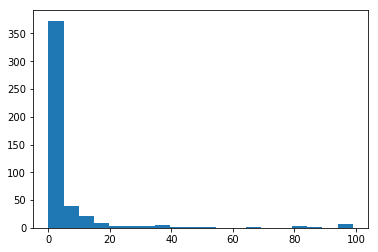

In [58]:
# Histogram of sourceEdit
plt.hist(edit_n_size_pd['sourceEdit'][~np.isnan(edit_n_size_pd['sourceEdit'])], bins =20)   # exclude NaN

In [122]:
total_not_nan_se = len(edit_n_size_pd['sourceEdit'][~np.isnan(edit_n_size_pd['sourceEdit'])])
stat_mode_se = stats.mode(edit_n_size_pd['sourceEdit'][~np.isnan(edit_n_size_pd['sourceEdit'])])[0][0]
mode_freq_se = stats.mode(edit_n_size_pd['sourceEdit'][~np.isnan(edit_n_size_pd['sourceEdit'])])[1][0]

print('The total articles that is not NaN is '+str(total_not_nan_se))
print('Most frequent edit amount per article is '+str(stat_mode_se)+' time.')
print('The number of articles that have been edited '+str(stat_mode_se)+' time is '+str(mode_freq_se))
print('The number of articles that have been edited 1 time is '+str(len(edit_n_size_pd[edit_n_size_pd['sourceEdit']==1] )))

The total articles that is not NaN is 477
Most frequent edit amount per article is 0.0 time.
The number of articles that have been edited 0.0 time is 197
The number of articles that have been edited 1 time is 89


###  The target article edit amount since the translation (targetEdit) <a name="targetEdit"></a>

In [21]:
edit_n_size_pd.nlargest(5, 'targetEdit')

,sourceTitle,sourceRevisionId,targetTitle,targetRevisionId,dateCreatingTarget,sourceEdit,targetEdit,sourceSizeChange,targetSizeChange
324,List of mango cultivars,861744980,รายชื่อพันธุ์มะม่วง,7893244,2018-10-09T09:24:43Z,11.0,100.0,2203.0,5204.0
376,Deaths in 2019,876398709,บุคคลที่เสียชีวิตในปี พ.ศ. 2562,8042701,2019-01-02T03:20:02Z,99.0,53.0,17261.0,9057.0
61,Find Your Way,853018077,ไฟด์ยัวร์เวย์,7777929,2018-08-12T06:03:49Z,2.0,51.0,93.0,4567.0
345,Isan Pattaya,835833752,สโมสรฟุตบอลอีสาน ดีบีชออร่า พัทยา,7966349,2018-11-19T15:30:55Z,13.0,36.0,2159.0,26704.0
67,Under My Skin (Gabrielle album),856381641,อันเดอร์มายสกิน,7803885,2018-08-26T03:00:57Z,14.0,31.0,2698.0,5310.0


(array([433.,  26.,   6.,   3.,   3.,   1.,   1.,   1.,   0.,   0.,   2.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([  1.  ,   5.95,  10.9 ,  15.85,  20.8 ,  25.75,  30.7 ,  35.65,
         40.6 ,  45.55,  50.5 ,  55.45,  60.4 ,  65.35,  70.3 ,  75.25,
         80.2 ,  85.15,  90.1 ,  95.05, 100.  ]),
 <a list of 20 Patch objects>)

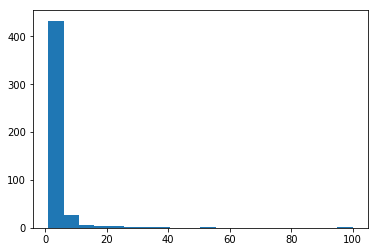

In [41]:
# Histogram of targetEdit
plt.hist(edit_n_size_pd['targetEdit'][~np.isnan(edit_n_size_pd['targetEdit'])], bins =20)   # exclude NaN

In [124]:
total_not_nan_te = len(edit_n_size_pd['targetEdit'][~np.isnan(edit_n_size_pd['targetEdit'])])
stat_mode_te = stats.mode(edit_n_size_pd['targetEdit'][~np.isnan(edit_n_size_pd['targetEdit'])])[0][0]
mode_freq_te = stats.mode(edit_n_size_pd['targetEdit'][~np.isnan(edit_n_size_pd['targetEdit'])])[1][0]

print('The total articles that is not NaN is '+str(total_not_nan_te))
print('Most frequent edit amount per article is '+str(stat_mode_te)+' time.')
print('The number of articles that have been edited '+str(stat_mode_te)+' time is '+str(mode_freq_te))
print('The number of articles that have been edited 0 time is '+str(len(edit_n_size_pd[edit_n_size_pd['sourceEdit']==0] )))

The total articles that is not NaN is 477
Most frequent edit amount per article is 1.0 time.
The number of articles that have been edited 1.0 time is 139
The number of articles that have been edited 0 time is 197


### The source article cumulative size change since the translation (sourceSizeChange) <a name="sourceSizeChange"></a>

In [22]:
edit_n_size_pd.nlargest(5, 'sourceSizeChange')

,sourceTitle,sourceRevisionId,targetTitle,targetRevisionId,dateCreatingTarget,sourceEdit,targetEdit,sourceSizeChange,targetSizeChange
424,Hindenburg disaster,875776290,วินาศภัยไฮเดลเบิร์ก,8047957,2019-01-05T01:47:44Z,47.0,3.0,526087.0,125.0
34,List of Seventeen concert tours,849101456,รายชื่อทัวร์คอนเสิร์ตและแฟนมีตติงของเซเวนทีน,7715180,2018-07-07T07:05:09Z,82.0,19.0,44978.0,36104.0
18,Treaty of Hudaybiyyah,846946779,สนธิสัญญาฮุดัยบิยะฮ์,7723118,2018-07-11T13:59:17Z,81.0,1.0,39781.0,0.0
43,Bongbong Marcos,849969829,บองบอง มาร์กอส,7728170,2018-07-14T12:09:29Z,84.0,3.0,22228.0,83.0
327,Goblin Slayer,866058978,ก็อบลิน สเลเยอร์,7926159,2018-10-28T09:50:59Z,99.0,11.0,18664.0,5998.0


(array([474.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([     0.  ,  26304.35,  52608.7 ,  78913.05, 105217.4 , 131521.75,
        157826.1 , 184130.45, 210434.8 , 236739.15, 263043.5 , 289347.85,
        315652.2 , 341956.55, 368260.9 , 394565.25, 420869.6 , 447173.95,
        473478.3 , 499782.65, 526087.  ]),
 <a list of 20 Patch objects>)

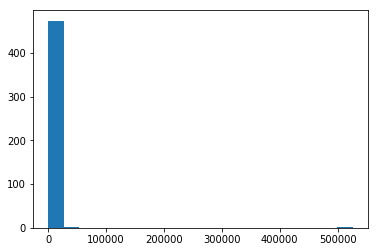

In [129]:
# Histogram of sourceSizeChange
plt.hist(edit_n_size_pd['sourceSizeChange'][~np.isnan(edit_n_size_pd['sourceSizeChange'])], bins =20)   # exclude NaN

In [109]:
total_not_nan_sc = len(edit_n_size_pd['sourceSizeChange'][~np.isnan(edit_n_size_pd['sourceSizeChange'])])
stat_mode_sc = stats.mode(edit_n_size_pd['sourceSizeChange'][~np.isnan(edit_n_size_pd['sourceSizeChange'])])[0][0]
mode_freq_sc = stats.mode(edit_n_size_pd['sourceSizeChange'][~np.isnan(edit_n_size_pd['sourceSizeChange'])])[1][0]
median_sc = np.median(edit_n_size_pd['sourceSizeChange'][~np.isnan(edit_n_size_pd['sourceSizeChange'])])

print('The total articles that is not NaN is '+str(total_not_nan_sc))
print('Most frequent size change per article is '+str(stat_mode_sc)+' byte.')
print('The number of articles that have total size change equal to '+str(stat_mode_sc)+'byte is '+str(mode_freq_sc))
print('The median of size chage is '+str(median_sc )+' bytes.')

The total articles that is not NaN is 477
Most frequent size change per article is 0.0 byte.
The number of articles that have total size change equal to 0.0byte is 207
The median of size chage is 13.0 byte.


###  The target article cumulative size change since it the translation (targetSizeChange) <a name="targetSizeChange"></a>

In [23]:
edit_n_size_pd.nlargest(5, 'targetSizeChange')

,sourceTitle,sourceRevisionId,targetTitle,targetRevisionId,dateCreatingTarget,sourceEdit,targetEdit,sourceSizeChange,targetSizeChange
34,List of Seventeen concert tours,849101456,รายชื่อทัวร์คอนเสิร์ตและแฟนมีตติงของเซเวนทีน,7715180,2018-07-07T07:05:09Z,82.0,19.0,44978.0,36104.0
352,List of legislatures by number of members,869603280,รายชื่อสภานิติบัญญัติแห่งชาติตามจำนวนสมาชิก,7982431,2018-11-28T11:46:26Z,3.0,5.0,123.0,29282.0
345,Isan Pattaya,835833752,สโมสรฟุตบอลอีสาน ดีบีชออร่า พัทยา,7966349,2018-11-19T15:30:55Z,13.0,36.0,2159.0,26704.0
354,List of countries by body mass index,870854912,รายชื่อประเทศเรียงตามดัชนีมวลกาย,7982462,2018-11-28T12:13:27Z,36.0,8.0,898.0,22626.0
92,List of elevation extremes by country,853994442,รายชื่อประเทศเรียงตามระดับความสูง,7826515,2018-09-06T13:30:46Z,22.0,7.0,1374.0,19504.0


(array([441.,  12.,   8.,   3.,   3.,   4.,   0.,   0.,   0.,   1.,   1.,
          0.,   1.,   0.,   1.,   0.,   1.,   0.,   0.,   1.]),
 array([    0. ,  1805.2,  3610.4,  5415.6,  7220.8,  9026. , 10831.2,
        12636.4, 14441.6, 16246.8, 18052. , 19857.2, 21662.4, 23467.6,
        25272.8, 27078. , 28883.2, 30688.4, 32493.6, 34298.8, 36104. ]),
 <a list of 20 Patch objects>)

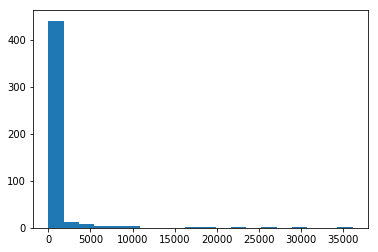

In [138]:
# Histogram of targetSizeChange
plt.hist(edit_n_size_pd['targetSizeChange'][~np.isnan(edit_n_size_pd['targetSizeChange'])], bins =20)   # exclude NaN

In [127]:
total_not_nan_tc = len(edit_n_size_pd['targetSizeChange'][~np.isnan(edit_n_size_pd['targetSizeChange'])])
stat_mode_tc = stats.mode(edit_n_size_pd['targetSizeChange'][~np.isnan(edit_n_size_pd['targetSizeChange'])])[0][0]
mode_freq_tc = stats.mode(edit_n_size_pd['targetSizeChange'][~np.isnan(edit_n_size_pd['targetSizeChange'])])[1][0]
median_tc = np.median(edit_n_size_pd['targetSizeChange'][~np.isnan(edit_n_size_pd['targetSizeChange'])])

print('The total articles that is not NaN is '+str(total_not_nan_tc))
print('Most frequent size change per article is '+str(stat_mode_tc)+' byte.')
print('The number of articles that have total size change equal to '+str(stat_mode_tc)+' byte is '+str(mode_freq_tc))
print('The median of size chage is '+str(median_tc)+' bytes.')

The total articles that is not NaN is 477
Most frequent size change per article is 0.0 byte.
The number of articles that have total size change equal to 0.0 byte is 152
The median of size chage is 25.0 bytes.


Text(0.5, 1.0, 'targetEdit vs targetSizeChange')

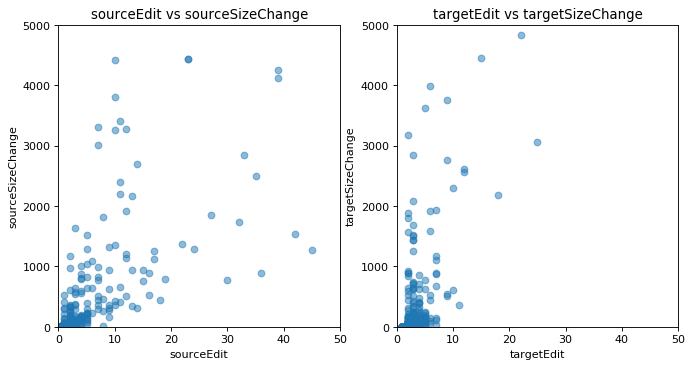

In [211]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 5), dpi=80)

plt.subplot(1,2,1)
plt.scatter(edit_n_size_pd['sourceEdit'],edit_n_size_pd['sourceSizeChange'], alpha = 0.5)
plt.xlim(0,50)
plt.ylim(0, 5000)
plt.xlabel('sourceEdit')
plt.ylabel('sourceSizeChange')
plt.title('sourceEdit vs sourceSizeChange')

plt.subplot(1,2,2)
plt.scatter(edit_n_size_pd['targetEdit'],edit_n_size_pd['targetSizeChange'],alpha = 0.5)
plt.xlim(0,50)
plt.ylim(0, 5000)
plt.xlabel('targetEdit')
plt.ylabel('targetSizeChange')
plt.title('targetEdit vs targetSizeChange')

Text(0.5, 1.0, 'sourceSizeChange vs targetSizeChange')

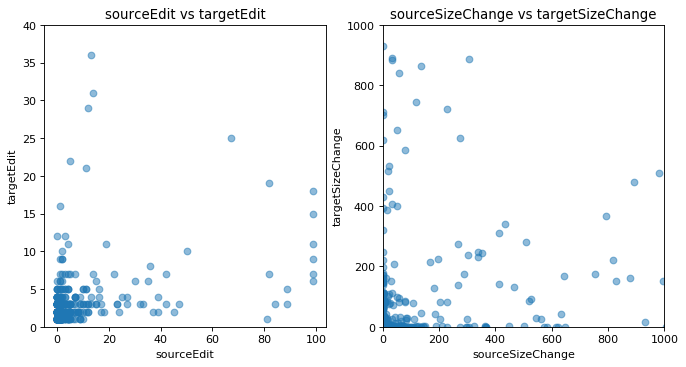

In [212]:
figure(num=None, figsize=(10, 5), dpi=80)

plt.subplot(1,2,1)
plt.scatter(edit_n_size_pd['sourceEdit'],edit_n_size_pd['targetEdit'], alpha = 0.5)
plt.ylim(0, 40)
plt.xlabel('sourceEdit')
plt.ylabel('targetEdit')
plt.title('sourceEdit vs targetEdit')

plt.subplot(1,2,2)
plt.scatter(edit_n_size_pd['sourceSizeChange'],edit_n_size_pd['targetSizeChange'], alpha = 0.5)
plt.xlim(0,1000)
plt.ylim(0, 1000)
plt.xlabel('sourceSizeChange')
plt.ylabel('targetSizeChange')
plt.title('sourceSizeChange vs targetSizeChange')

### Quantitative test discuession <a name="Quantitativedis"></a>
ส่วนมากเป็นอะไร
เปรียบเทียบกัน

ยากที่จะระบุ trend

## Qualitative <a name="Qualitative"></a>

The articles that have highest `sourceEdit`, `targetEdit`, `sourceSizeChange`, and `targetSizeChange` were chosen to do qualitative analysis

###  Highest sourceEdit article <a name="Highse"></a>
Reminding that `sourceEdit` was count from the day that the source article got translated into Thai ariticle (from `dateCreatingTarget`), since the objective is to see the difference and similarity in both articles after translation.

Make sense that Deaths in 2019 have high edit because 2019 is this current year.

In [24]:
pd.options.display.max_colwidth = 100    # to view long URL
df[['sourceURL','targetURL']][df['sourceTitle'] == 'Deaths in 2019']

,sourceURL,targetURL
376,//en.wikipedia.org/wiki/Deaths in 2019,//th.wikipedia.org/wiki/บุคคลที่เสียชีวิตในปี พ.ศ. 2562


###  Highest targetEdit article  <a name="Highte"></a>


In [25]:
df[['sourceURL','targetURL']][df['sourceTitle'] == 'List of mango cultivars']

,sourceURL,targetURL
324,//en.wikipedia.org/wiki/List of mango cultivars,//th.wikipedia.org/wiki/รายชื่อพันธุ์มะม่วง


###  Highest sourceSizeChange article <a name="Highsc"></a>
Similar to `sourceEdit`, `sourceSizeChange` also count from the day that the source article got translated into Thai ariticle.


In [26]:
df[['sourceURL','targetURL']][df['sourceTitle'] == 'Hindenburg disaster']

,sourceURL,targetURL
424,//en.wikipedia.org/wiki/Hindenburg disaster,//th.wikipedia.org/wiki/วินาศภัยไฮเดลเบิร์ก


###  Highest targetSizeChange article <a name="Hightc"></a>

In [27]:
df[['sourceURL','targetURL']][df['sourceTitle'] == 'List of Seventeen concert tours']

,sourceURL,targetURL
34,//en.wikipedia.org/wiki/List of Seventeen concert tours,//th.wikipedia.org/wiki/รายชื่อทัวร์คอนเสิร์ตและแฟนมีตติงของเซเวนทีน


### Qualitative test discuession <a name="Qualitativedis"></a>

# Conclusion <a name="Conclusion"></a>
from  corresponding parallel translation
Descriptive statistics:
18300 translated sections.
2670 translated articles.
Machine translation services used: {'no-mt': 16474, 'Yandex': 1642, 'Google': 183, 'scratch': 1}

## Opportunities for furture study <a name="Opportunities"></a>
+ Use revisions API to collect comments to see what kind of words were used frequently in the comments
+ Use revisions API to see which kind of article were edited by anonymous or regular users
+ Use revisions API to collect target size change per edit data. Then compare small size edit (possibly typo fixed) to large size edit (possibly significant data changed) 
+ Use page view API to compare page views between source and target articles

---

### Others data explore <a name="Others"></a>

In [28]:
df[['sourceTitle','targetTitle']][:30]

,sourceTitle,targetTitle
0,Sonia Scurfield,ซอนย่า สเกอร์ฟิลด์
1,Andrew Massey (conductor),แอนดี แมสซีย์ (วาทยากร)
2,Sam Moore (publisher),ซัม มัวร์ (ผู้เผยแพร่)
3,André Desvages,อ็องเดร เดอวาก
4,Johnnie Keyes,จอห์นนี่ คียส์
5,Robert Forhan,โรเบิร์ต ฟอร์แฮน
6,Amand Dalem,อามันด์ ดาเลม
7,Édouard Ferrand,เอดูอาร์ แฟร็อง
8,Zeng Jinyan,เจิ้ง จินย่าน
9,Jean-Baptiste Kim,จีน-บาติสต์ คิม


##### The Holy city article

In [29]:
df[df['sourceTitle'] == 'Holy city']

,publishedDate,sourceLanguage,sourceRevisionId,sourceTitle,sourceURL,stats,targetLanguage,targetRevisionId,targetTitle,targetURL,translationId
20,20180625112801,en,845754238,Holy city,//en.wikipedia.org/wiki/Holy city,"{'any': 0.8185914552737, 'human': 0.81692256341789, 'mt': 0.0016688918558077, 'mtSectionsCount': 1}",th,7694813,เมืองศักดิ์สิทธิ์,//th.wikipedia.org/wiki/เมืองศักดิ์สิทธิ์,492437


In [30]:
holyc_source_title = df.loc[20, 'sourceTitle']
holyc_target_title = df.loc[20, 'targetTitle']
holyc_tid = df.loc[20,'translationId']
holyc_source_revid = df.loc[20, 'sourceRevisionId']
print(holyc_source_title)
print(holyc_target_title)
print(holyc_tid)
print(holyc_source_revid)

Holy city
เมืองศักดิ์สิทธิ์
492437
845754238


In [31]:
# Translated sections for "Holy city" article
for translated_section in parallel_corpus:
    if translated_section['id'].split('/')[0] == holyc_tid:
        print(translated_section, '\n')

{'id': '492437/69824d3b0e70ca6aaa0da1613b65fd', 'sourceLanguage': 'en', 'targetLanguage': 'th', 'source': {'content': 'References'}, 'mt': {'engine': 'Yandex', 'content': 'อ้างอิง'}, 'target': {'content': 'References'}} 

{'id': '492437/0f5fbbd8e643b1b08a782d4e206f94', 'sourceLanguage': 'en', 'targetLanguage': 'th', 'source': {'content': 'South Asia'}, 'mt': None, 'target': {'content': 'เอเชียใต้'}} 

{'id': '492437/2d1b84c3b2d1353bb8d6c146558555', 'sourceLanguage': 'en', 'targetLanguage': 'th', 'source': {'content': 'Americas'}, 'mt': None, 'target': {'content': 'อเมริกา'}} 

{'id': '492437/37ee626c09bb4ac040663fda7879ea', 'sourceLanguage': 'en', 'targetLanguage': 'th', 'source': {'content': 'West Asia'}, 'mt': None, 'target': {'content': 'เอเชียตะวันตก'}} 

{'id': '492437/6f202f54a7b2d8fe42aa804eabe48e', 'sourceLanguage': 'en', 'targetLanguage': 'th', 'source': {'content': 'List'}, 'mt': None, 'target': {'content': 'รายชื่อเมืองศักดิ์สิทธิ์ทั่วโลก'}} 

{'id': '492437/a5893730881df686